In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.11
    Uninstalling kagglehub-0.3.11:
      Successfully uninstalled kagglehub-0.3.11


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ritesaluja/bank-note-authentication-uci-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-note-authentication-uci-data


In [ ]:
data=pd.read_csv("/kaggle/input/bank-note-authentication-uci-data/BankNote_Authentication.csv")

data=np.array(data)

np.random.shuffle(data)

X=data[:,:2]
y=data[:,-1]
y[y==0]=-1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train=(X_train-np.mean(X_train,axis=0)/np.std(X_train,axis=0))
X_test=(X_test-np.mean(X_test,axis=0)/np.std(X_test,axis=0))

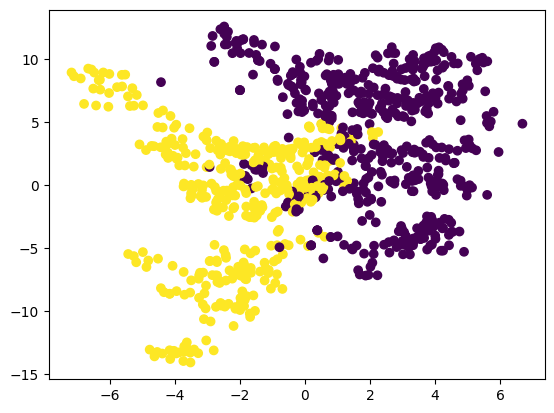

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [ ]:
def Perceptron(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        Error=0
        for i in range(len(y)):

            yhat= np.dot(W,X[i].T) + b
            yhat= 1 if yhat>0 else -1

            W= W - eta * (yhat-y[i]) * X[i]
            b=b - eta * (yhat-y[i])

            Error+= 1 if (yhat-y[i])!=0  else 0

        if j%100==0:
            print(Error)
    return W,b,Error

In [ ]:
W1,b1,Error1= Perceptron(X_train,y_train,1500,0.001)

283
158
158
157
161
156
158
157
160
158
153
169
154
161
154


In [ ]:
def Decision_Boundary(X,y,W,b,Error):
    dum_x=np.linspace(-2,5,100)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.plot(dum_x,((-dum_x * W[0])-b)/W[1])
    plt.title("Error: "+ str(Error))
    plt.show()

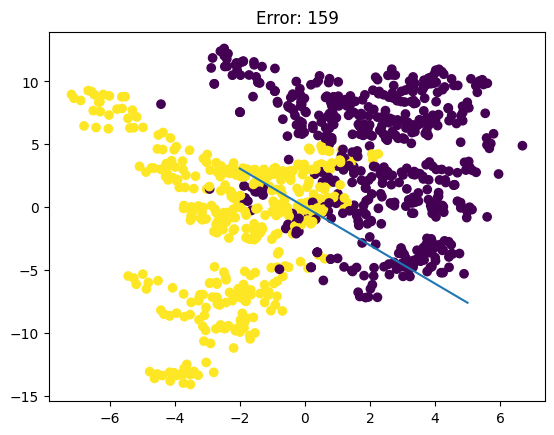

In [ ]:
Decision_Boundary(X_train,y_train,W1,b1,Error1)

In [ ]:
def Adaline(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Error= (1/(2*len(y))) * np.sum((yhat-y)**2)

        W= W - eta * np.mean((yhat-y) * X.T)
        b= b- eta * np.mean(yhat-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [ ]:
W2,b2,Error2= Adaline(X_train,y_train,1500,0.001)

55.08742417228353
0.49177977888509977
0.26521747075555585
0.25487631932510396
0.2469996682097208
0.2404699237290434
0.2350544894871698
0.23056319787560295
0.22683834412783807
0.22374913580141106
0.22118710015375798
0.21906227529047753
0.21730005129341845
0.21583855040952143
0.21462645430982222


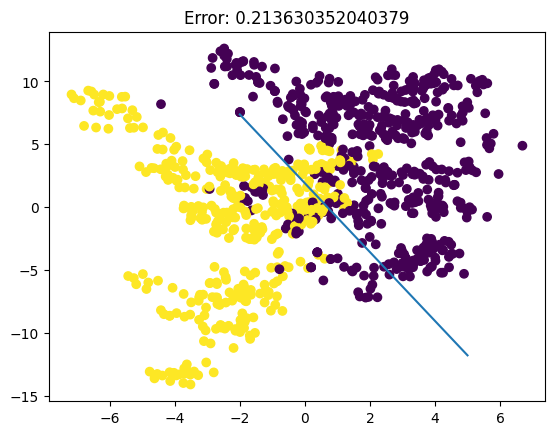

In [ ]:
Decision_Boundary(X_train,y_train,W2,b2,Error2)

In [ ]:
def Logistic_Regression(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Z=1/(1 + np.exp(-yhat))

        Error= np.sum((y * np.log(Z+1e-10) + (1-y) * np.log(1-Z+1e-10))) * -1/len(y)

        W= W - eta * np.mean((Z-y) * X.T)
        b= b- eta * np.mean(Z-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [ ]:
W3,b3,Error3= Logistic_Regression(X_train,y_train,1500,0.01)

3.8155213710272524
-3.5308445197199534
-5.204956285850107
-5.1825669814488915
-4.97915692133942
-4.70505358132976
-4.461642702111486
-4.278271515874618
-4.138897659797289
-4.0361384436844965
-3.9600657880130283
-3.8968352592743316
-3.843437974993021
-3.795476637900031
-3.7482229641046882


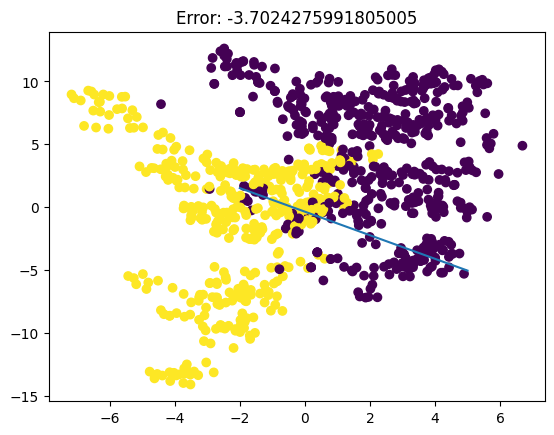

In [ ]:
Decision_Boundary(X_train,y_train,W3,b3,Error3)

In [ ]:
def test_model(W,b,X_test,y_test,arch):
    y_pred= np.dot(W,X_test.T) + b

    if arch=="Perceptron" or arch=="Adaline":
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
    else:
        y_pred=1/(1 + np.exp(-y_pred))
        y_pred[y_pred<0.5]=-1
        y_pred[y_pred>0.5]=1

    print('\n',arch,(np.sum(y_pred==y_test)/len(y_test)) * 100)

In [ ]:
test_model(W1,b1,X_test,y_test,"Perceptron")
test_model(W2,b2,X_test,y_test,"Adaline")
test_model(W3,b3,X_test,y_test,"Logistic_Regression")


 Perceptron 83.00970873786407

 Adaline 87.13592233009709

 Logistic_Regression 74.02912621359224
